# Stack


### 什么是栈

想象一摞被堆起来的书，这就是栈。这堆书的特点是，最后被堆进去的书，永远在最上面。从这堆书里面取一本书出来，取哪本书最方便？肯定是最上面那本。

栈这种数据结构的特点就是如此：后进先出（Last In First Out - LIFO），即最后被堆进去的数据，最先被拿出来。

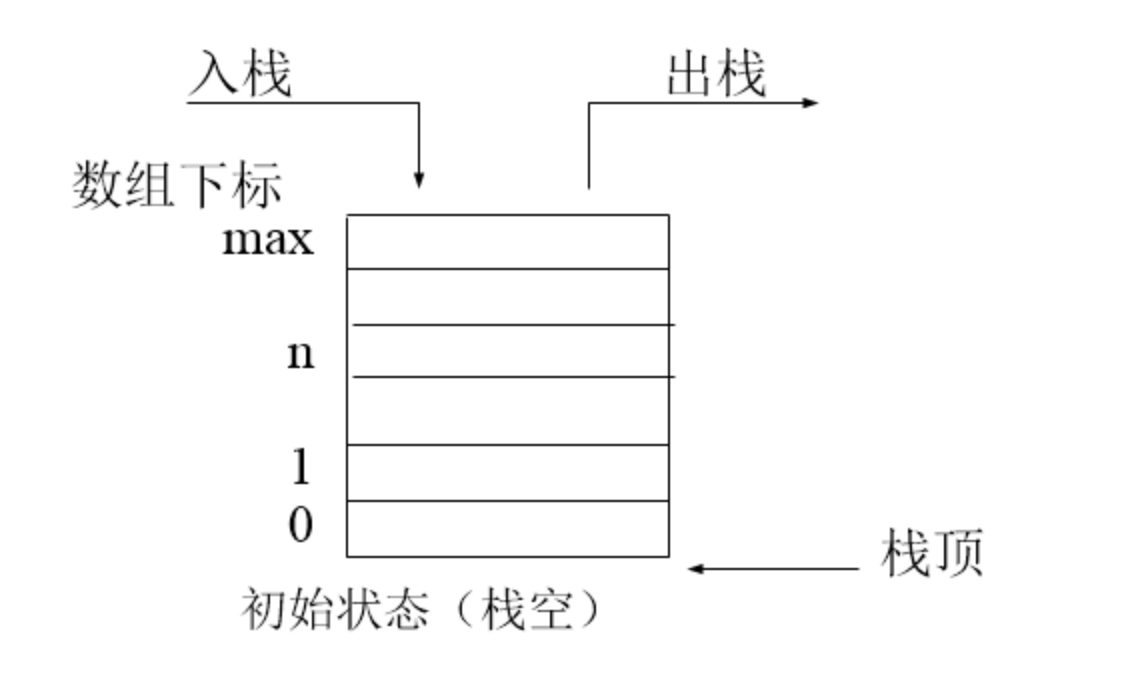

### 用python实现栈

In [3]:
class Stack:
    # initial as empty list
    def __init__(self):
        self.stack = []
        
    # check the stack is empty or not, return bool 
    def is_empty(self):
        return self.stack == []
        
    # 返回栈顶元素 return the last element
    def peek(self):
        return self.stack[-1]

    # 返回栈的大小 return size of stack
    def size(self):
        return len(self.stack)

    # 把新的元素堆进栈里面 append new element to stack
    def push(self, item):
        self.stack.append(item)

    # 把栈顶元素丢出去 remove the last element of stack
    def pop(self):
        if self.stack:
            self.stack.pop()
        else:
            raise LookupError('Stack is empty')


### 补充（python私有方法和私有属性属性理解,子类继承）

私有属性、方法——Python并没有真正的私有化支持，但可用下划线得到伪私有
尽量避免定义以下划线开头的变量

（1）_xxx      "单下划线 " 开始的成员变量叫做保护变量，意思是只有类对象（即类实例）和子类对象自己能访问到这些变量，需通过类提供的接口进行访问；不能用'from module import *'导入

（2）__xxx    类中的私有变量/方法名 （Python的函数也是对象，所以成员方法称为成员变量也行得通。）," 双下划线 " 开始的是私有成员，意思是只有类对象自己能访问，连子类对象也不能访问到这个数据。

（3）__xxx__ 系统定义名字，前后均有一个“双下划线” 代表python里特殊方法专用的标识，如 __init__() 代表类的构造函数。

##### example

In [5]:
class Dog():
    def __sit_down(self):
        print('坐下了')
    def sit_down(self,host_name):
        if host_name=='主人':
            self.__sit_down()

In [7]:
w = Dog()
w.sit_down('主人')

坐下了


In [10]:
w.sit_down('主')

以下情况会报错

In [9]:
w.__sit_down()

AttributeError: 'Dog' object has no attribute '__sit_down'

In [11]:
 w._Dog__sit_down()

坐下了


 私有的属性，不能通过对象直接访问，但是可以通过方法访问
 
私有的方法，不能通过对象直接访问

私有的属性、方法，不会被子类继承，也不能被访问

一般情况下，私有的属性、方法都是不对外公布的，往往用来做内部的事情，起到安全的作用

可以通过调用继承的父类的共有方法，间接的访问父类的私有方法、属性

#### Stack的例子：符号平衡

In [ ]:
from datastructure import Stack

# 定义一个检查符号平衡的函数，string是需要检查的字符串
def symbol_check(string):
    # 初始化一个栈，名字叫symbol_stack
    symbol_stack = Stack()

    # 设置一个布尔变量用来记录符号是否平衡，假设一开始是平衡的
    balenced = True
    left_symbols = '{[('
    right_symbols = ')]}'   
    # 迭代字符串string
    for current_symbol in string:
        # 如果被扫描到的字符是{或[或(，下文把它们叫做左符号，那么把这个字符压栈
        if current_symbol in left_symbols:
            symbol_stack.push(symbol)
        else:
            if symbol_stack.is_empty():
                balanced = False
            # 出栈并比较栈顶元素和被扫描到的符号是否配对
            else:
                stack_top = symbol.pop()
                if left_symbols.index(stack_top) != right_symbols.index(current_symbol):
                    balanced = False
        if balanced and symbol_stack.is_empty():
            balanced = True
        else:
            balanced = False

# Queues

先进先出 
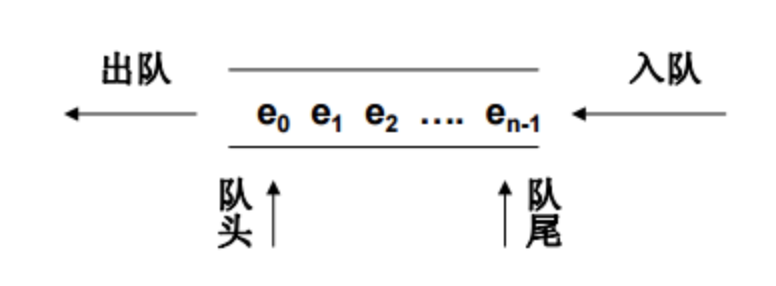

### 实现列队

我们定义如下的链表来实现队列数据结构：
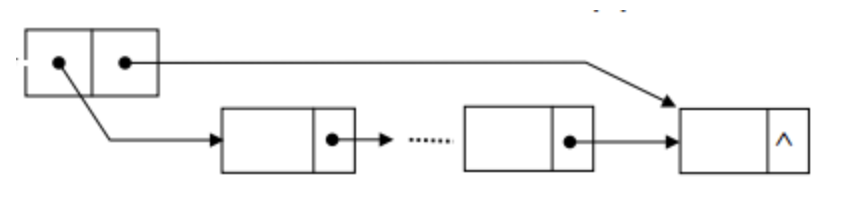
定义一个头结点，左边指向队列的开头，右边指向队列的末尾，这样就可以保证我们插入一个元素和取出一个元素都是O

#### python实现

In [12]:
class Head(object):
    def __init__(self):
        self.left = None
        self.right = None

class Node(object):
    def __init__(self, value):
        self.value = value
        self.next = None

class Queue(object):
    def __init__(self):
        #初始化节点
        self.head = Head()

    def enqueue(self, value):
        #插入一个元素
        newnode = Node(value)
        p = self.head
        if p.right:
            #如果head节点的右边不为NOne
            #说明队列中已经有元素了
            #就执行下列的操作
            temp = p.right
            p.right = newnode
            temp.next = newnode
        else:
            #这说明队列为空，插入第一个元素
            p.right = newnode
            p.left = newnode

    def dequeue(self):
        #取出一个元素
        p = self.head
        if p.left and (p.left == p.right):
            #说明队列中已经有元素
            #但是这是最后一个元素
            temp = p.left
            p.left = p.right = None
            return temp.value
        elif p.left and (p.left != p.right):
            #说明队列中有元素，而且不止一个
            temp = p.left
            p.left = temp.next
            return temp.value

        else:
            #说明队列为空
            #抛出查询错误
            raise LookupError('queue is empty!')

    def is_empty(self):
        if self.head.left:
            return False
        else:
            return True

    def top(self):
        #查询目前队列中最早入队的元素
        if self.head.left:
            return self.head.left.value
        else:
            raise LookupError('queue is empty!')